## Uniform Manifold Approximation and Projection (UMAP)
DImensionality Reduction technique, best at capturing complex, non-linear patterns in data points and preserving most of the structure of the data (better than PCA and t-SNE)

Ref - 
1. https://www.youtube.com/watch?v=015vL0cJfA0
2. https://umap-learn.readthedocs.io/en/latest/basic_usage.html# (main)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pickle

In [4]:
pickle_in = open("/content/drive/MyDrive/IDSIA Biomedical Texts/AllSourceandLIWCdatasetcleaned.pickle", 'rb')
df = pickle.load(pickle_in)
df

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,https://www.quora.com/What-are-panic-attacks-l...,I have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.00,26.39,...,0.0,0.0,19.93,4.61,9.88,0.16,0.16,2.80,2.31,0.33
1,https://www.quora.com/What-are-panic-attacks-l...,"I was walking to school, but was running late ...",Quora,1,401,54.08,1.31,99.00,8.57,13.83,...,0.0,0.0,13.47,6.98,4.74,0.25,0.00,1.50,0.00,0.00
2,https://www.quora.com/What-are-panic-attacks-l...,"For me, panic attacks come two ways: randomly ...",Quora,1,446,25.83,93.36,75.79,1.00,12.74,...,0.0,0.0,16.59,8.07,2.69,0.22,0.00,4.71,0.90,0.00
3,https://www.quora.com/What-are-panic-attacks-l...,"I’m driving home, riding a tingly high from sa...",Quora,1,525,30.63,2.97,96.06,6.86,15.44,...,1.9,0.0,21.52,5.33,4.95,1.14,0.00,6.67,3.43,0.00
4,https://www.quora.com/What-are-panic-attacks-l...,It feels like your body turns into a black hol...,Quora,1,323,21.57,1.00,99.00,1.12,13.46,...,0.0,0.0,18.27,7.12,4.33,0.93,0.00,5.26,0.62,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,NaN,"Hi Ttrung,\nYour story is very similar to my o...",Beyond Blue Forums,0,237,5.24,20.52,53.23,15.51,16.93,...,0.0,0.0,10.13,5.49,1.69,0.00,0.00,2.53,0.42,0.00
7401,NaN,Hi startingnew \nThanks for replying I am tryi...,Beyond Blue Forums,0,20,39.70,1.00,28.56,99.00,20.00,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7402,NaN,Hi Mspurple \nThanks for replying I am trying ...,Beyond Blue Forums,0,19,36.67,3.34,70.28,99.00,19.00,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7403,NaN,Hi T4 \nThats ok many many people are on medic...,Beyond Blue Forums,0,38,36.67,90.88,33.61,92.27,19.00,...,0.0,0.0,2.63,2.63,0.00,0.00,0.00,0.00,0.00,2.63


In [5]:
pickle_in = open("/content/drive/MyDrive/IDSIA Biomedical Texts/AllSourcesentenceembeddings.pickle", 'rb')
sentence_embeddings = pickle.load(pickle_in)
sentence_embeddings

array([[-2.03777283e-01, -1.01813227e-01,  8.92902136e-01, ...,
         2.60930300e-01, -1.09038711e-01,  4.07246292e-01],
       [-1.13255486e-01,  1.47696435e-01,  4.11327243e-01, ...,
         3.82578701e-01, -7.98140049e-01,  3.63534272e-01],
       [-3.27023923e-01,  3.19835782e-01,  9.14233565e-01, ...,
         5.73383152e-01, -2.06755698e-01,  2.09511489e-01],
       ...,
       [-2.30550960e-01,  6.88925445e-01,  2.27567172e+00, ...,
        -9.31809768e-02, -6.35690272e-01,  2.79080391e-01],
       [-3.08767051e-01,  7.42158532e-01,  8.38804960e-01, ...,
         5.68321033e-04, -1.63675129e-01,  3.88005450e-02],
       [-3.28077316e-01,  6.52241409e-01,  8.23546886e-01, ...,
         7.15532422e-01, -6.84921861e-01,  3.67347598e-01]], dtype=float32)

In [6]:
len(sentence_embeddings)

7405

In [7]:
len(sentence_embeddings[0])

768

In [8]:
sentence_embeddings.shape

(7405, 768)

## Applying U-MAP and plotting on all dataset

In [10]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=a94bf6624c5ea67bae497af378384dbb3747e6e61f282ce1f8e6293b907ba661
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=0e32222267b1085d04eef75c3251959775ead4ac91bc8c3cc41b6ddd34a7d06f
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [14]:
import umap.umap_ as umap

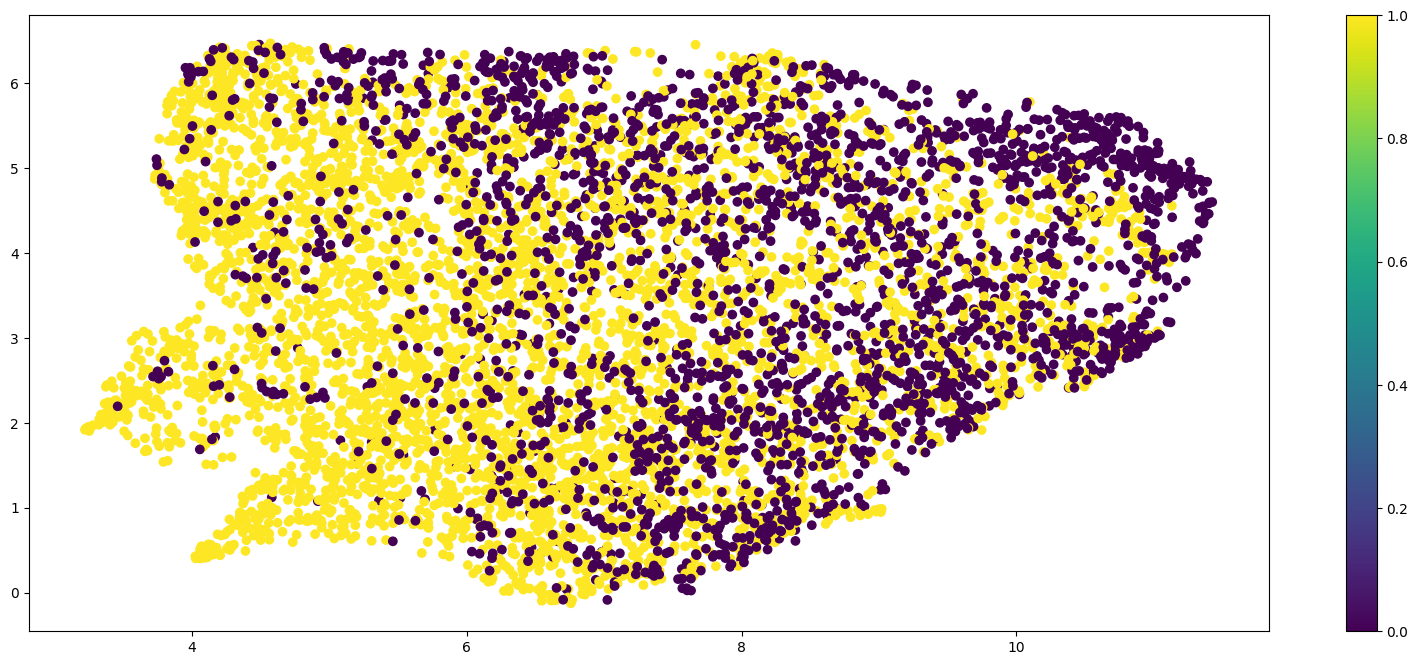

In [35]:
# Perform U-Map dimensionality reduction
reducer = umap.UMAP(n_components=2)  # Reduce to 2 dimensions
embedding_2d = reducer.fit_transform(sentence_embeddings)

plt.figure(figsize=(20, 8))

# Plot the U-Map graph
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=df['label'])
plt.colorbar()
plt.show()
#1 for panic, 0 for anxiety

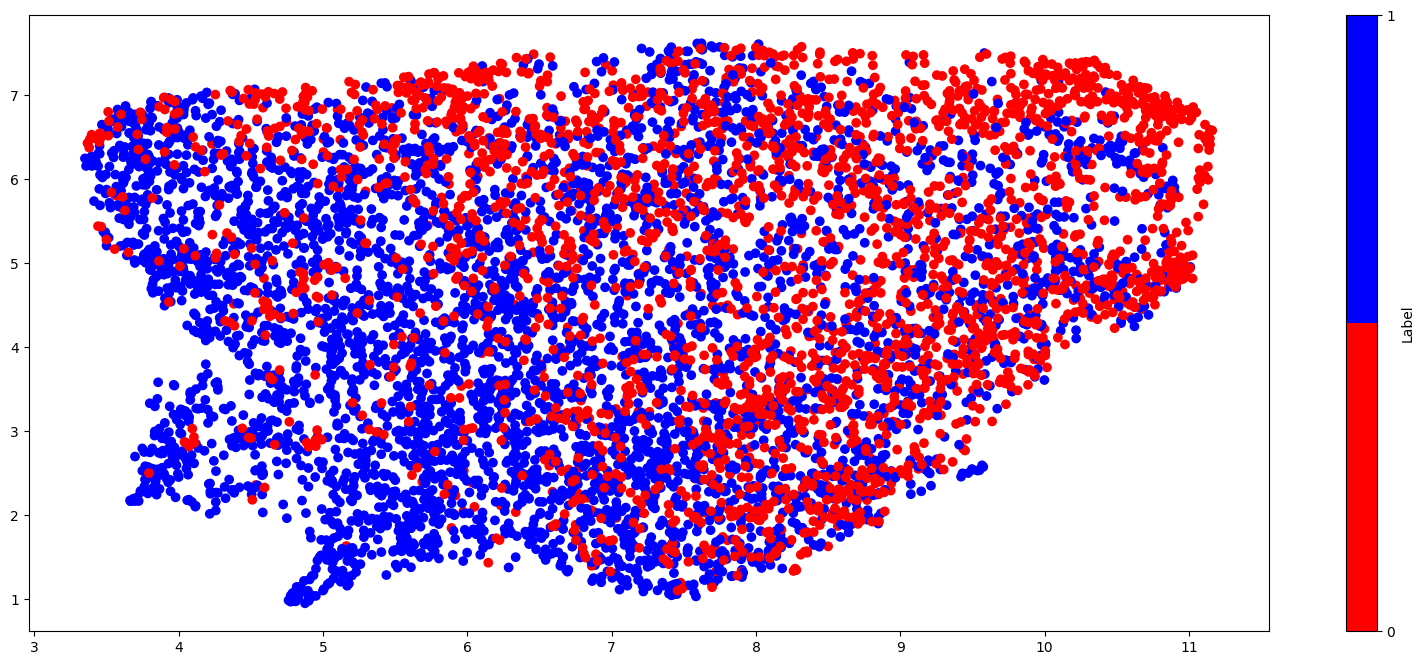

In [34]:
from matplotlib.colors import ListedColormap

reducer = umap.UMAP(n_components=2)  # Reduce to 2 dimensions
embedding_2d = reducer.fit_transform(sentence_embeddings)

plt.figure(figsize=(20, 8))

# Define colors for labels 0 and 1
colors = ['red', 'blue']

# Create a custom colormap
cmap = ListedColormap(colors)

# Plot the U-Map graph with colorbar
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=df['label'], cmap=cmap)
plt.colorbar(ticks=[0, 1], label='Label')
plt.show()
#1 for panic, 0 for anxiety

In [18]:
reducer

UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [19]:
embedding_2d

array([[9.031637  , 4.062932  ],
       [5.2152243 , 0.41369614],
       [5.9890776 , 0.3664471 ],
       ...,
       [7.4586153 , 5.2657576 ],
       [8.685727  , 5.259621  ],
       [8.227082  , 4.2349186 ]], dtype=float32)

In [20]:
embedding_2d.shape

(7405, 2)

## Applying U-MAP and plotting on Reddit dataset

In [42]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=52265571cb36bc4e02312bfe23b353022b20a80de34be03e1d6dcc7b4bd0e6d8
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [43]:
from sentence_transformers import SentenceTransformer

In [44]:
model = SentenceTransformer('bert-base-nli-mean-tokens')
# https://sbert.net/ - for more models, commonly used ones are 'bert-base-nli-mean-tokens' and 'distilbert-base-nli-mean-tokens'

In [41]:
reddit_df = df[df['source'] == 'Reddit']
reddit_df.reset_index(drop=True, inplace=True)
reddit_df.head()

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,NaN,I've almost asked this questions several times...,Reddit,1,43,4.09,1.00,99.00,20.23,8.60,...,0.0,0.0,25.58,9.30,6.98,0.0,2.33,6.98,0.00,0.0
1,NaN,The numbness and tingling in the hands is spec...,Reddit,1,193,59.25,58.56,32.02,1.00,17.55,...,0.0,0.0,21.76,5.70,11.40,0.0,0.00,1.55,3.11,0.0
2,NaN,I got the same symptoms as you and add the hot...,Reddit,1,21,42.52,16.63,56.69,1.00,21.00,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0
3,NaN,i’ve dealt with panic attacks since I started ...,Reddit,1,266,47.78,1.55,99.00,3.61,14.78,...,0.0,0.0,12.41,6.77,2.26,0.0,0.00,2.63,0.75,0.0
4,NaN,Mine usually start by feeling lightheaded or i...,Reddit,1,69,12.27,1.00,99.00,1.00,13.80,...,0.0,0.0,14.49,7.25,1.45,0.0,0.00,5.80,0.00,0.0


In [45]:
# Dataset of texts
reddit_sentences = list(reddit_df['text'])

In [46]:
reddit_sentence_embeddings = model.encode(reddit_sentences) # 3 mins to run on standard runtime

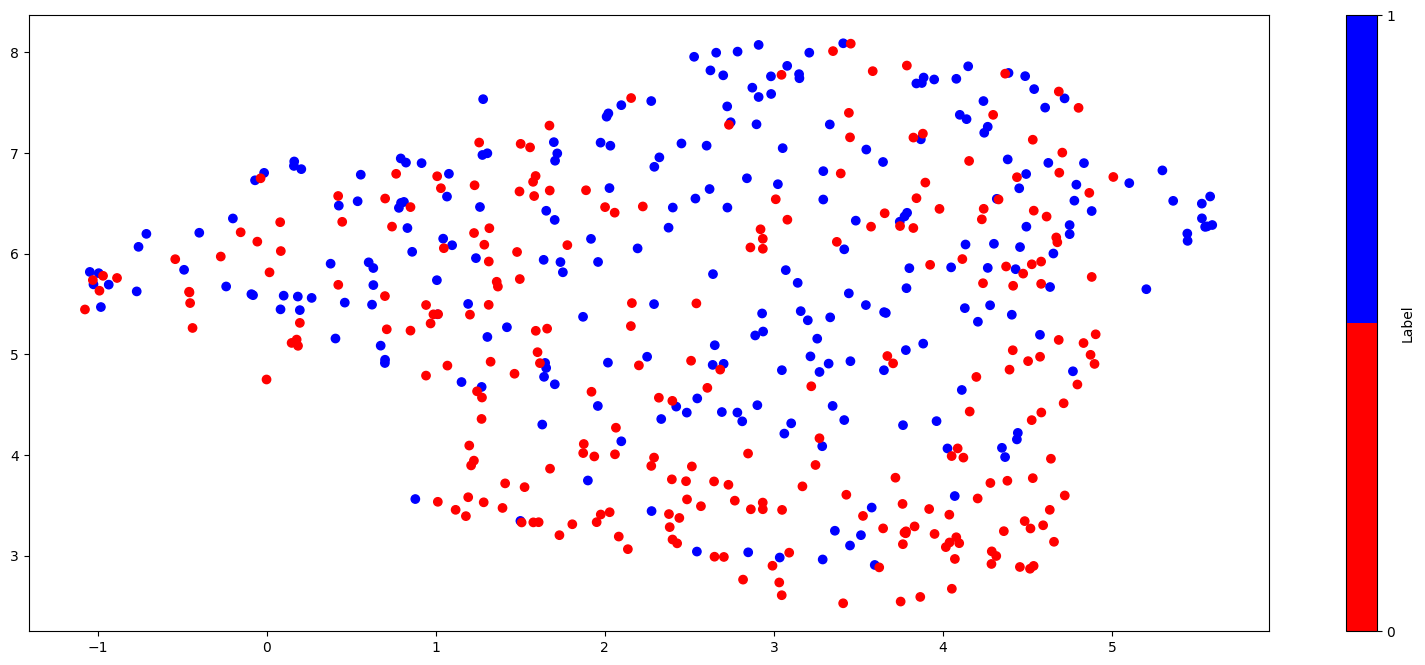

In [47]:
from matplotlib.colors import ListedColormap

reducer = umap.UMAP(n_components=2)  # Reduce to 2 dimensions
reddit_embedding_2d = reducer.fit_transform(reddit_sentence_embeddings)

plt.figure(figsize=(20, 8))

# Define colors for labels 0 and 1
colors = ['red', 'blue']

# Create a custom colormap
cmap = ListedColormap(colors)

# Plot the U-Map graph with colorbar
plt.scatter(reddit_embedding_2d[:, 0], reddit_embedding_2d[:, 1], c = reddit_df['label'], cmap=cmap)
plt.colorbar(ticks=[0, 1], label='Label')
plt.show()
#1 for panic, 0 for anxiety

## Applying U-MAP and plotting on Reddit dataset

In [51]:
quora_df = df[df['source'] == 'Quora']
quora_df.reset_index(drop=True, inplace=True)
quora_df.head()

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,https://www.quora.com/What-are-panic-attacks-l...,I have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.00,26.39,...,0.0,0.0,19.93,4.61,9.88,0.16,0.16,2.80,2.31,0.33
1,https://www.quora.com/What-are-panic-attacks-l...,"I was walking to school, but was running late ...",Quora,1,401,54.08,1.31,99.00,8.57,13.83,...,0.0,0.0,13.47,6.98,4.74,0.25,0.00,1.50,0.00,0.00
2,https://www.quora.com/What-are-panic-attacks-l...,"For me, panic attacks come two ways: randomly ...",Quora,1,446,25.83,93.36,75.79,1.00,12.74,...,0.0,0.0,16.59,8.07,2.69,0.22,0.00,4.71,0.90,0.00
3,https://www.quora.com/What-are-panic-attacks-l...,"I’m driving home, riding a tingly high from sa...",Quora,1,525,30.63,2.97,96.06,6.86,15.44,...,1.9,0.0,21.52,5.33,4.95,1.14,0.00,6.67,3.43,0.00
4,https://www.quora.com/What-are-panic-attacks-l...,It feels like your body turns into a black hol...,Quora,1,323,21.57,1.00,99.00,1.12,13.46,...,0.0,0.0,18.27,7.12,4.33,0.93,0.00,5.26,0.62,0.00


In [52]:
# Dataset of texts
quora_sentences = list(quora_df['text'])

In [53]:
quora_sentence_embeddings = model.encode(quora_sentences) # mins to run on standard runtime

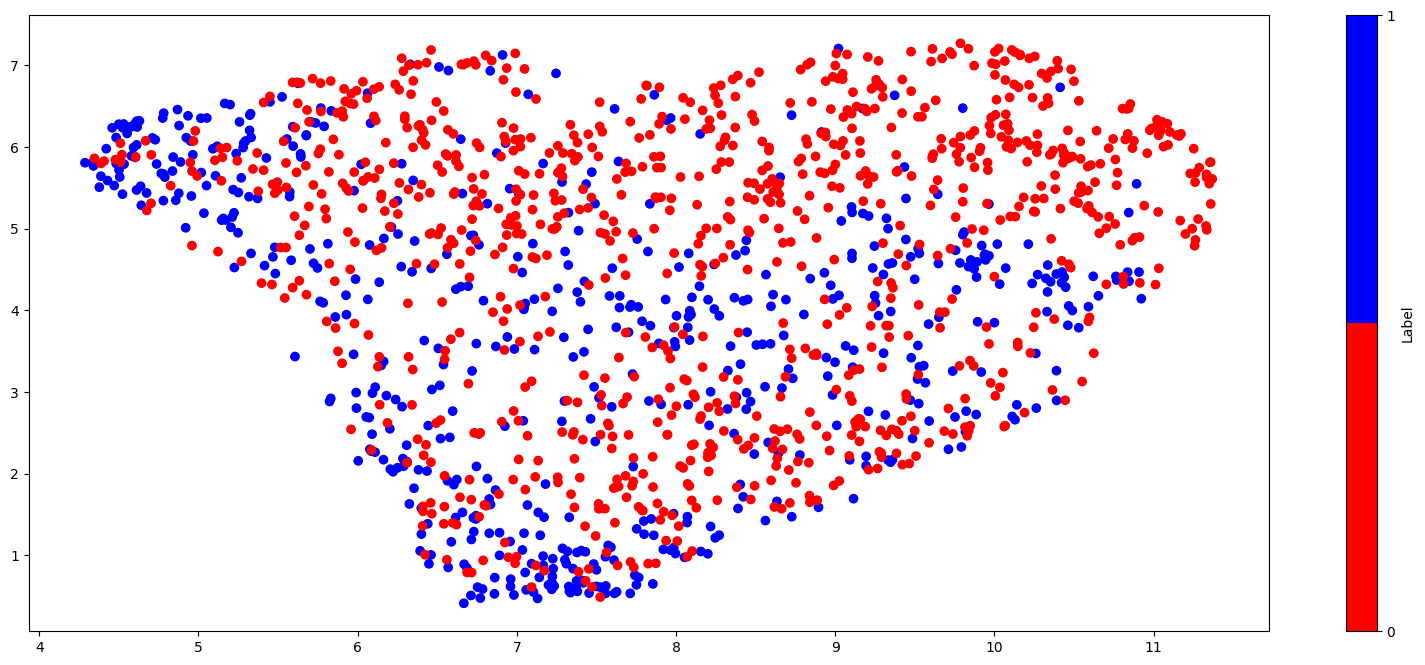

In [54]:
from matplotlib.colors import ListedColormap

reducer = umap.UMAP(n_components=2)  # Reduce to 2 dimensions
quora_embedding_2d = reducer.fit_transform(quora_sentence_embeddings)

plt.figure(figsize=(20, 8))

# Define colors for labels 0 and 1
colors = ['red', 'blue']

# Create a custom colormap
cmap = ListedColormap(colors)

# Plot the U-Map graph with colorbar
plt.scatter(quora_embedding_2d[:, 0], quora_embedding_2d[:, 1], c = quora_df['label'], cmap=cmap)
plt.colorbar(ticks=[0, 1], label='Label')
plt.show()
#1 for panic, 0 for anxiety